In [2]:
.5 ** 100

7.888609052210118e-31

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output data
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1

np.random.seed(1)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    
    # Calculate the error
    error = y - predicted_output
    
    # Backpropagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
hidden_layer_input = np.dot(test_input, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print(f"label: {y}")
print(f"prediction: {predicted_output}")

label: [[0]
 [1]
 [1]
 [0]]
prediction: [[0.0461657 ]
 [0.94432796]
 [0.94450208]
 [0.05573581]]


#### Python 으로 수행하는 주파수 분석 - FFT, STFT

- 먼저 numpy 를 이용해서 아래와 같은 삼각함수를 다소 간단한 형태로 정의해 둔다.

$$
y=a\sin{2\pi ft}
$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt


def sin_wave(amp, freq, time):  # y = asin2(pi)ft
    return amp * np.sin(2*np.pi*freq*time)

이제 시간 간격을 0.001(=1 milli-sec)로 두고 0초 부터 10초까지 시간(time)을 변수로 정의했다. 그리고 크기(amount)가 각각 1, 2, 4 이고 주파수가 각각 10, 5, 1Hz가 되도록 sin1, sin2, sin3 이라는 데이터를 만들어 둔다. 각 데이터는 time에 의해 시간축 길이는 10초이다.

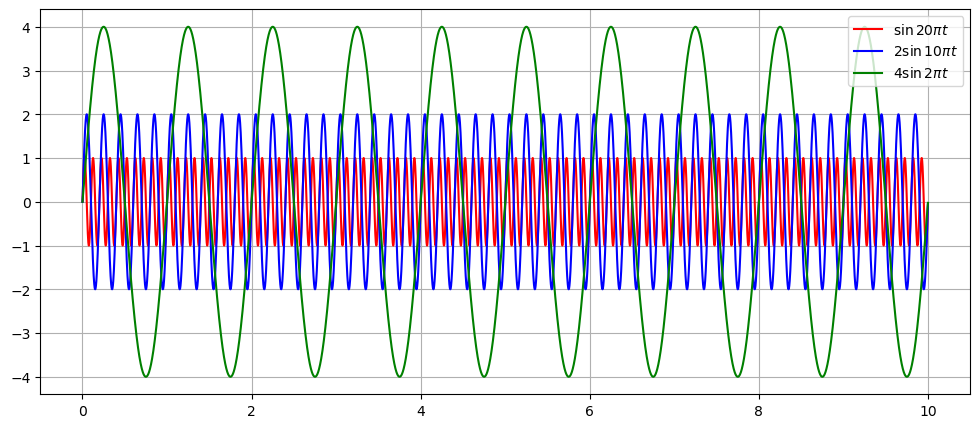

In [31]:
time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

위의 시험용 데이터가 어떻게 생격는지 확인해보면, 크기와 주파수가 다른 세 개의 신호가 확인이 된다.

이제 앞서 만든 세 개의 신호를 모두 더해서 sin_sum이라는 변수에 두고, 더한 sin을 시각화 해보자.

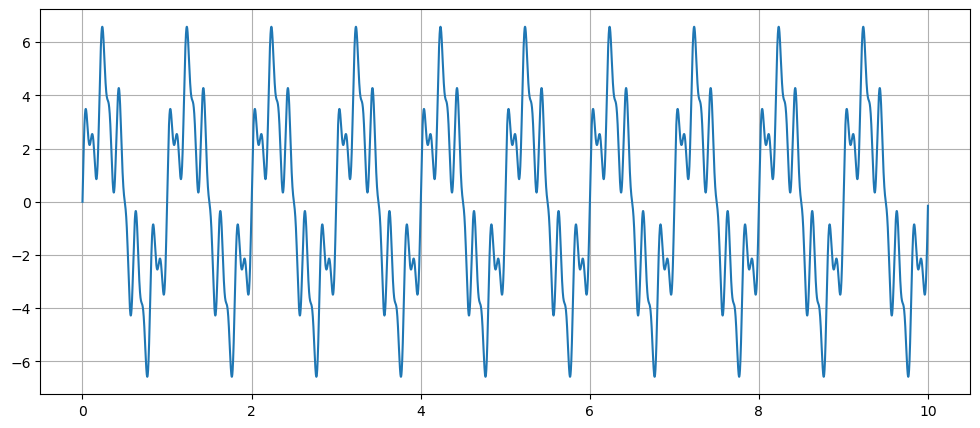

In [32]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

이번엔 각각의 다른 신호와 그 신호들을 모두 더한 신호를 모두 한번에 시각화 해보자.

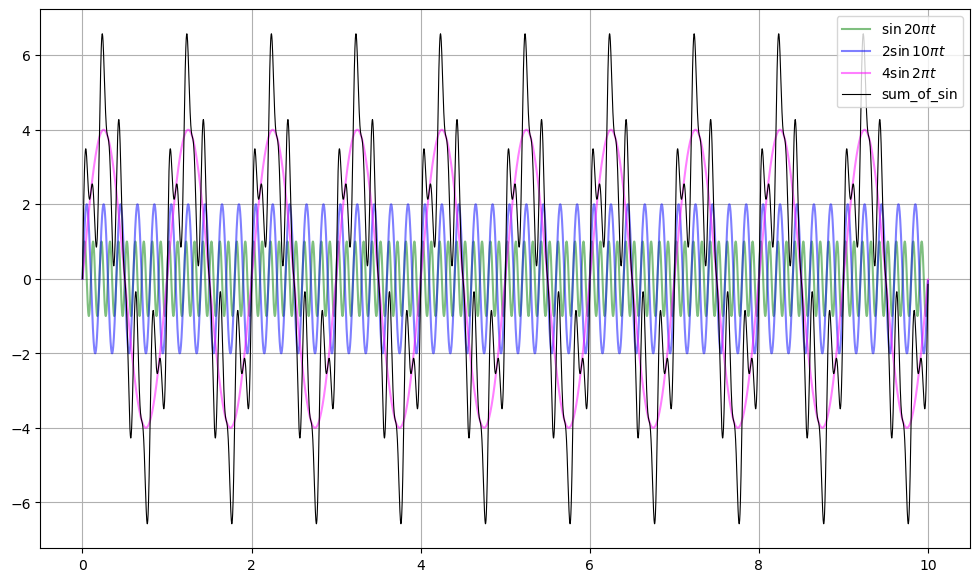

In [33]:
plt.figure(figsize=(12,7))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='green', alpha=0.5)
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue', alpha=0.5)
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='magenta', alpha=0.5)
plt.plot(time, sin_sum, label="sum_of_sin", color='black', lw=0.8)
plt.legend(); plt.grid(); plt.show()

In [35]:
Y = np.fft.fft(sin_sum)/n 
Y = Y[range(int(n/2))]

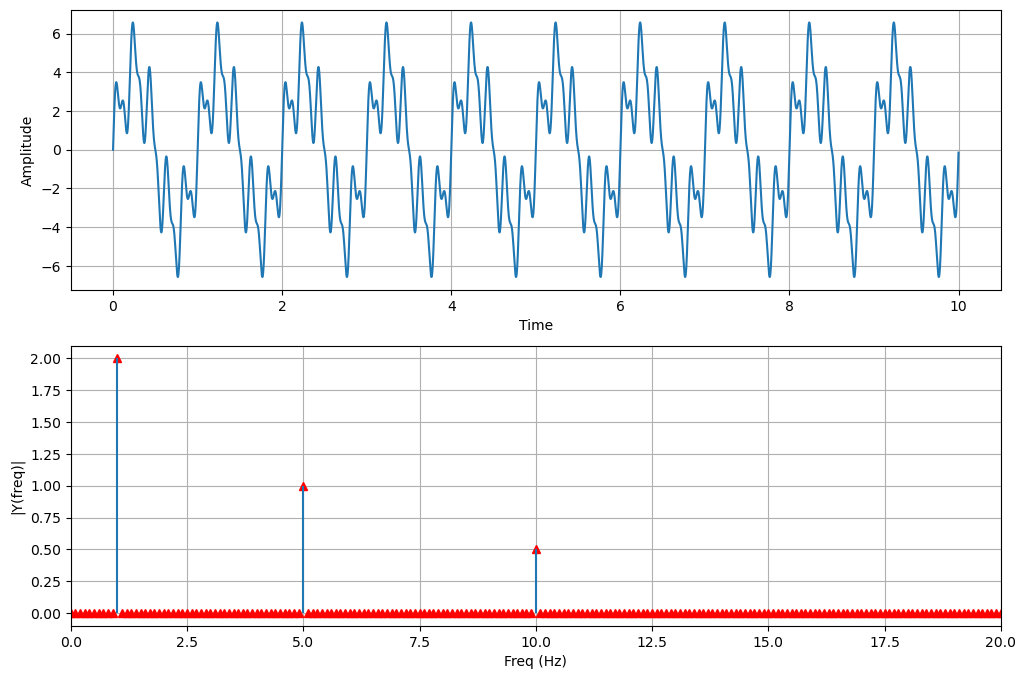

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [37]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

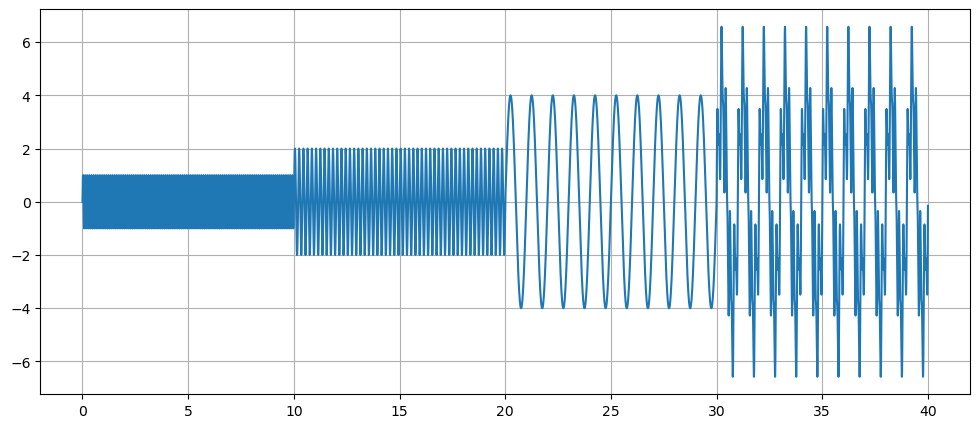

In [38]:
time = np.arange(0, 40, 0.001)

plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

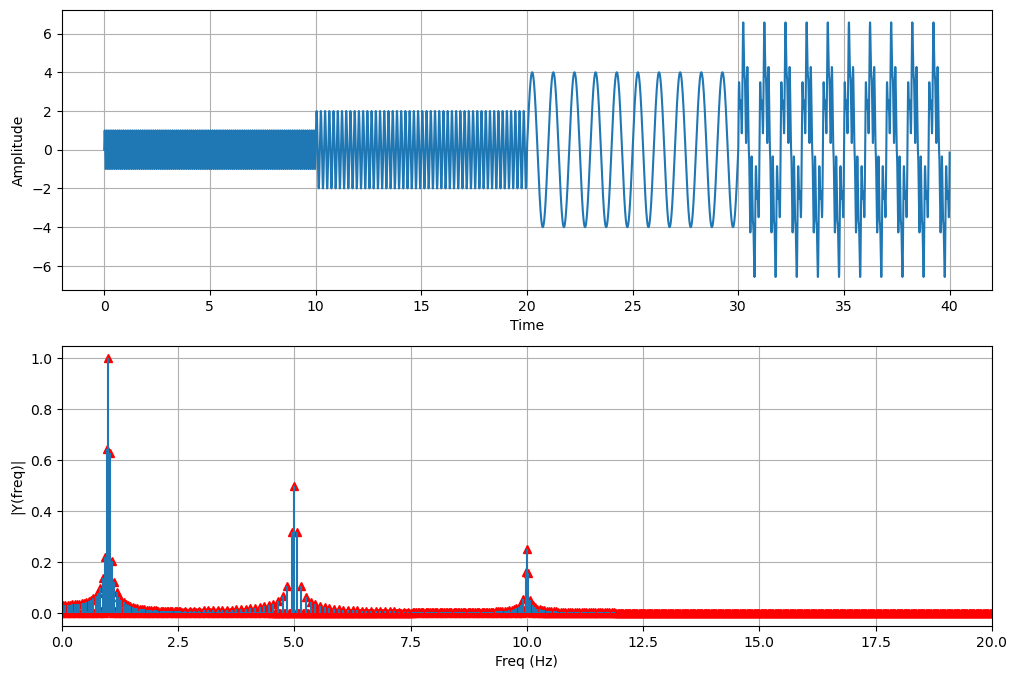

In [39]:
n = len(sin_concat) 
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))] 
Y = np.fft.fft(sin_concat)/n 
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([0, 20])
ax[1].vlines(freq, [0], abs(Y)); ax[1].grid(True)
plt.show()

In [40]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [41]:
from scipy import signal

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

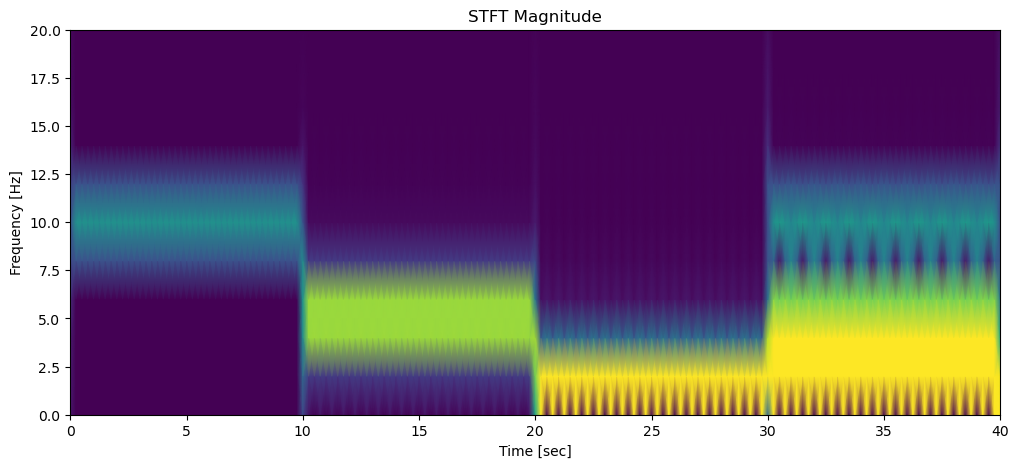

In [43]:
calc_stft(500)

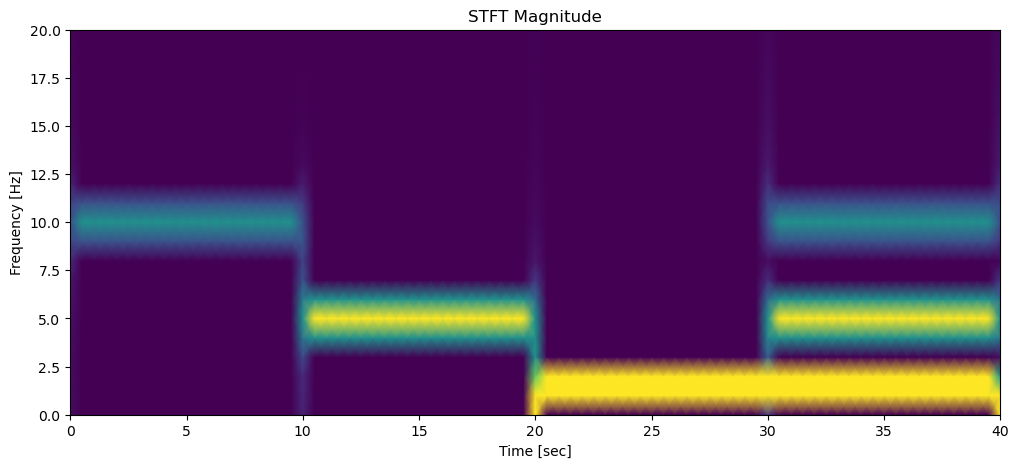

In [44]:
calc_stft(1000)

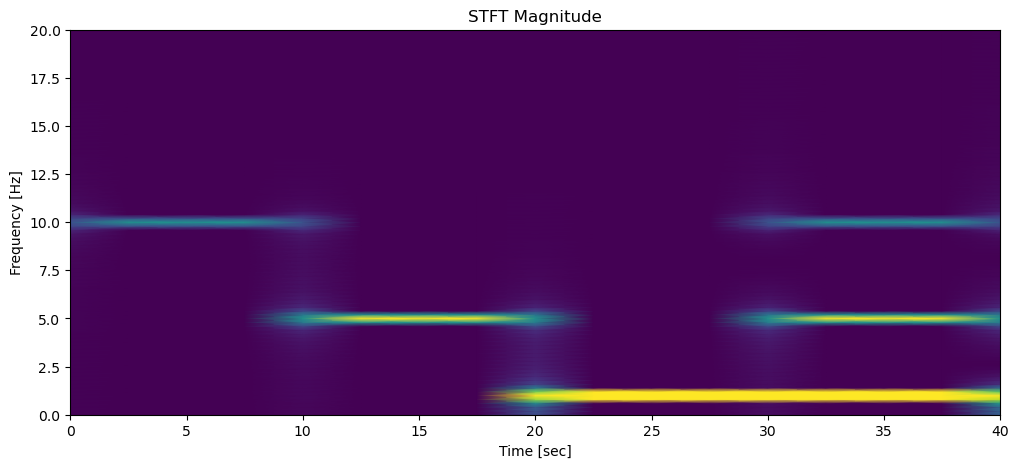

In [45]:
calc_stft(5000)

In [2]:
import numpy as np
from scipy.integrate import quad


def f(x):
    return 2 * np.pi * x

result = quad(f, 0, 3)

print("적분값:", result[0])
print("오차값:", result[1])

적분값: 28.274333882308138
오차값: 3.1390816482077685e-13


In [3]:
r = 3
np.pi * (r**2)

28.274333882308138

In [6]:
first = 0.64
second = 0.8 ** 2
third = 1-(0.6 ** 2)
print(first, second, third)

0.64 0.6400000000000001 0.64
